In [1]:
# Import libraries 

seed_value=0

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  
import sys
import warnings
import os
import random


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder


os.environ['PYTHONHASHSEED']=str(seed_value)
os.environ['CUDA_VISIBLE_DEVICES'] = ''

random.seed(seed_value)
tf.random.set_seed(seed_value)
np.random.seed(seed_value)


> *Dataset used here is The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS) https://zenodo.org/record/1188976#.YySVxHbMJPY .*

In [2]:
RAV = "ravdess-emotional-speech-audio/audio_speech_actors_01-24/"


dir_list = os.listdir(RAV)
dir_list.sort()


emotion = []
intensity = []
statement = []
repitation = []
gender = []
path = []

for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        intensity.append(int(part[3]))
        statement.append(int(part[4]))
        repitation.append(int(part[5]))

        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)

        
dict_df = {
    "emotion_num":emotion,
    "gender":gender,
    "intensity":intensity,
    "statement":statement,
    "repitation":repitation,
    "path":path
}

dataset = pd.DataFrame(dict_df)
dataset['emotion'] = dataset['emotion_num'].replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fearful', 7:'disgust', 8:'surprised'})
dataset.head()


,emotion_num,gender,intensity,statement,repitation,path,emotion
0,1,male,1,1,1,ravdess-emotional-speech-audio/audio_speech_ac...,neutral
1,1,male,1,1,2,ravdess-emotional-speech-audio/audio_speech_ac...,neutral
2,1,male,1,2,1,ravdess-emotional-speech-audio/audio_speech_ac...,neutral
3,1,male,1,2,2,ravdess-emotional-speech-audio/audio_speech_ac...,neutral
4,2,male,1,1,1,ravdess-emotional-speech-audio/audio_speech_ac...,calm


In [3]:
#Copying the dataset

df = dataset.copy()
df.shape

(1440, 7)

## > *Checking if the dataset is balanced*

In [4]:
df['gender'].value_counts()

male      720
female    720
Name: gender, dtype: int64

In [5]:
df['emotion'].value_counts()

calm         192
happy        192
sad          192
angry        192
fearful      192
disgust      192
surprised    192
neutral       96
Name: emotion, dtype: int64

> *Though there is less audio recording on emotion 'neutral', this dataset is considered balanced.*

In [6]:
df.to_csv('RAVDESS_dataset_description.csv', index=False)

In [7]:
from IPython.display import FileLink
FileLink('RAVDESS_dataset_description.csv')

C:\Users\GANGA GYATSO\Desktop\TSUNDUE\RAVDESS_dataset_description.csv

In [8]:
#Dataset = pd.read_csv('../input/ravdess-dataset-description/RAVDESS_dataset_description.csv')
#Dataset.head(10)

In [9]:
#df = Dataset.copy()
df['path'][0]

'ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav'

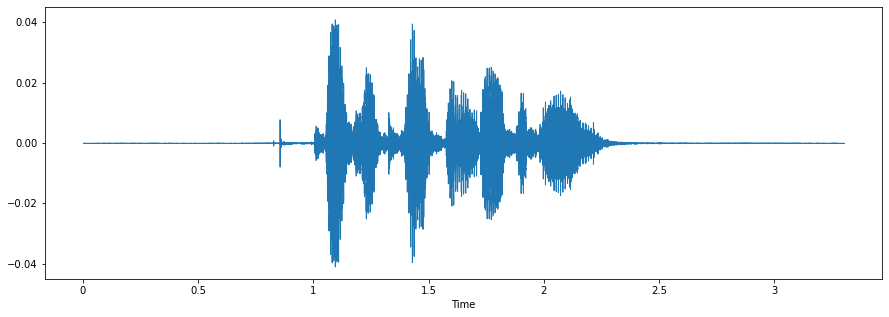

In [10]:
#Displaying one audio recording 

#Emotion = calm, Intensity = 1, Statement= 'dog walking ...', Gender = 'male'
audio_file_path = df['path'][0]
audio_data, sample_rate=librosa.load(audio_file_path)

plt.figure(figsize=(15, 5))
librosa.display.waveshow(audio_data, sr=sample_rate)

# Lets play the audio 
ipd.Audio(audio_file_path)

In [11]:
#Extracting the feature MFCC (Mel Frequency Cepstral Coefficients )

mfcc = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
mfcc.shape

(40, 143)

In [12]:
mfcc

array([[-857.354, -857.354, -857.354, ..., -857.354, -857.354, -857.354],
       [   0.   ,    0.   ,    0.   , ...,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   , ...,    0.   ,    0.   ,    0.   ],
       ...,
       [   0.   ,    0.   ,    0.   , ...,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   , ...,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   , ...,    0.   ,    0.   ,    0.   ]],
      dtype=float32)

In [13]:
#Function to extract feature 
def features_extractor(file):
    audio_data, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

# > *Some of the code below are commented to save time*

> *The features are extracted into dataset.*

In [15]:
'''
extracted_features=[]

for file_name in df['path']:
    data=features_extractor(file_name)
    extracted_features.append(data)

'''

"\nextracted_features=[]\n\nfor file_name in df['path']:\n    data=features_extractor(file_name)\n    extracted_features.append(data)\n\n"

In [16]:
'''
extracted_features = pd.DataFrame(extracted_features)
extracted_features.shape

'''

'\nextracted_features = pd.DataFrame(extracted_features)\nextracted_features.shape\n\n'

In [17]:
#extracted_features[:10]

In [18]:
'''
df = pd.concat([df, extracted_features], axis=1)
df.head(10)
'''


'\ndf = pd.concat([df, extracted_features], axis=1)\ndf.head(10)\n'

In [19]:
#df.to_csv('RAVDESS_dataset.csv', index=False)

In [20]:
'''
from IPython.display import FileLink
FileLink('RAVDESS_dataset.csv')
'''



"\nfrom IPython.display import FileLink\nFileLink('RAVDESS_dataset.csv')\n"

In [22]:
df = pd.read_csv('RAVDESS_dataset.csv')

In [23]:
#Defining X and y features

X = df.iloc[:,-40:]
y = df['emotion']
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

# No of classes
num_labels=y.shape[1]

In [24]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train = (X_train - X_train.min())/ (X_train.max() - X_train.min())
X_test = (X_test - X_test.min())/ (X_test.max() - X_test.min())


# > *Keras Tuner*

In [25]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
        
    model.add(layers.Dense(num_labels, activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

In [38]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [40]:

from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    project_name='Voice Sentiment Classification')

In [41]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [42]:
tuner.search(X_train, y_train,
             epochs=200,
             validation_data=(X_test, y_test))

Trial 5 Complete [00h 05m 21s]
val_accuracy: 0.48032407959302265

Best val_accuracy So Far: 0.48032407959302265
Total elapsed time: 00h 15m 47s
INFO:tensorflow:Oracle triggered exit


In [43]:
tuner.results_summary()

Results summary
Results in .\Voice Sentiment Classification
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 9
units_0: 160
units_1: 384
learning_rate: 0.0001
units_2: 384
units_3: 288
units_4: 448
units_5: 512
units_6: 416
units_7: 448
units_8: 224
units_9: 288
units_10: 320
units_11: 320
units_12: 256
units_13: 128
units_14: 64
units_15: 160
units_16: 128
units_17: 448
units_18: 96
Score: 0.48032407959302265
Trial summary
Hyperparameters:
num_layers: 19
units_0: 416
units_1: 320
learning_rate: 0.001
units_2: 512
units_3: 416
units_4: 256
units_5: 64
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
units_15: 32
units_16: 32
units_17: 32
units_18: 32
Score: 0.46759259700775146
Trial summary
Hyperparameters:
num_layers: 5
units_0: 192
units_1: 128
learning_rate: 0.01
units_2: 64
units_3: 192
units_4: 32
Score: 0.4513888855775197
Trial summary
Hyperparameters:
num_layers: 4
units_0: 416
units_1: 192
learning

In [44]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)


#model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), verbose=1)
history = model.fit(X_train, y_train, epochs=200,  validation_data=(X_test, y_test), verbose=1)



val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/200
36/36 [==============================] - 2s 23ms/step - loss: 2.0668 - accuracy: 0.1727 - val_loss: 2.0564 - val_accuracy: 0.1840
Epoch 2/200
36/36 [==============================] - 0s 12ms/step - loss: 1.9955 - accuracy: 0.1953 - val_loss: 1.9539 - val_accuracy: 0.1806
Epoch 3/200
36/36 [==============================] - 0s 12ms/step - loss: 1.8959 - accuracy: 0.2526 - val_loss: 1.8479 - val_accuracy: 0.3056
Epoch 4/200
36/36 [==============================] - 0s 12ms/step - loss: 1.8005 - accuracy: 0.3056 - val_loss: 1.7924 - val_accuracy: 0.2812
Epoch 5/200
36/36 [==============================] - 0s 12ms/step - loss: 1.7195 - accuracy: 0.3429 - val_loss: 1.6970 - val_accuracy: 0.3681
Epoch 6/200
36/36 [==============================] - 0s 12ms/step - loss: 1.6480 - accuracy: 0.3715 - val_loss: 1.6311 - val_accuracy: 0.3646
Epoch 7/200
36/36 [==============================] - 0s 12ms/step - loss: 1.6087 - accuracy: 0.3767 - val_loss: 1.6692 - val_accuracy: 0.3333
Epoch 

36/36 [==============================] - 1s 14ms/step - loss: 0.4476 - accuracy: 0.8368 - val_loss: 2.1960 - val_accuracy: 0.4965
Epoch 59/200
36/36 [==============================] - 1s 14ms/step - loss: 0.3950 - accuracy: 0.8672 - val_loss: 2.2399 - val_accuracy: 0.4722
Epoch 60/200
36/36 [==============================] - 1s 14ms/step - loss: 0.3854 - accuracy: 0.8611 - val_loss: 2.4934 - val_accuracy: 0.4688
Epoch 61/200
36/36 [==============================] - 0s 14ms/step - loss: 0.3384 - accuracy: 0.8767 - val_loss: 2.4081 - val_accuracy: 0.4931
Epoch 62/200
36/36 [==============================] - 0s 13ms/step - loss: 0.3084 - accuracy: 0.8932 - val_loss: 2.7784 - val_accuracy: 0.4965
Epoch 63/200
36/36 [==============================] - 0s 13ms/step - loss: 0.2926 - accuracy: 0.9080 - val_loss: 2.3639 - val_accuracy: 0.5035
Epoch 64/200
36/36 [==============================] - 0s 13ms/step - loss: 0.3115 - accuracy: 0.8950 - val_loss: 2.6762 - val_accuracy: 0.4931
Epoch 65/200

36/36 [==============================] - 1s 20ms/step - loss: 0.0100 - accuracy: 0.9991 - val_loss: 4.5285 - val_accuracy: 0.5104
Epoch 116/200
36/36 [==============================] - 1s 17ms/step - loss: 0.0089 - accuracy: 0.9991 - val_loss: 4.4673 - val_accuracy: 0.5035
Epoch 117/200
36/36 [==============================] - 1s 15ms/step - loss: 0.0080 - accuracy: 0.9991 - val_loss: 4.4923 - val_accuracy: 0.5069
Epoch 118/200
36/36 [==============================] - 1s 15ms/step - loss: 0.0080 - accuracy: 0.9991 - val_loss: 4.5880 - val_accuracy: 0.5000
Epoch 119/200
36/36 [==============================] - 1s 15ms/step - loss: 0.0098 - accuracy: 0.9991 - val_loss: 4.8089 - val_accuracy: 0.5139
Epoch 120/200
36/36 [==============================] - 1s 16ms/step - loss: 0.0085 - accuracy: 0.9991 - val_loss: 4.7524 - val_accuracy: 0.5104
Epoch 121/200
36/36 [==============================] - 1s 15ms/step - loss: 0.0075 - accuracy: 0.9991 - val_loss: 4.6547 - val_accuracy: 0.5104
Epoch 

36/36 [==============================] - 1s 15ms/step - loss: 5.7301e-04 - accuracy: 1.0000 - val_loss: 6.1819 - val_accuracy: 0.5000
Epoch 172/200
36/36 [==============================] - 1s 16ms/step - loss: 5.5947e-04 - accuracy: 1.0000 - val_loss: 6.2544 - val_accuracy: 0.5000
Epoch 173/200
36/36 [==============================] - 1s 15ms/step - loss: 5.3093e-04 - accuracy: 1.0000 - val_loss: 6.2133 - val_accuracy: 0.5000
Epoch 174/200
36/36 [==============================] - 1s 15ms/step - loss: 5.0840e-04 - accuracy: 1.0000 - val_loss: 6.2862 - val_accuracy: 0.5000
Epoch 175/200
36/36 [==============================] - 1s 15ms/step - loss: 5.0153e-04 - accuracy: 1.0000 - val_loss: 6.2874 - val_accuracy: 0.5000
Epoch 176/200
36/36 [==============================] - 1s 15ms/step - loss: 4.8918e-04 - accuracy: 1.0000 - val_loss: 6.2573 - val_accuracy: 0.5035
Epoch 177/200
36/36 [==============================] - 1s 16ms/step - loss: 4.7384e-04 - accuracy: 1.0000 - val_loss: 6.2859 -

In [45]:
hypermodel = tuner.hypermodel.build(best_hps)



# Retrain the model
hypermodel.fit(X_train, y_train, epochs=best_epoch,  validation_data=(X_test, y_test), verbose=1)

Epoch 1/87
36/36 [==============================] - 2s 23ms/step - loss: 2.0679 - accuracy: 0.1554 - val_loss: 2.0615 - val_accuracy: 0.1701
Epoch 2/87
36/36 [==============================] - 0s 12ms/step - loss: 2.0089 - accuracy: 0.2283 - val_loss: 1.9589 - val_accuracy: 0.2569
Epoch 3/87
36/36 [==============================] - 0s 13ms/step - loss: 1.8952 - accuracy: 0.2561 - val_loss: 1.8709 - val_accuracy: 0.2812
Epoch 4/87
36/36 [==============================] - 0s 13ms/step - loss: 1.7980 - accuracy: 0.2995 - val_loss: 1.7770 - val_accuracy: 0.3090
Epoch 5/87
36/36 [==============================] - 0s 12ms/step - loss: 1.7376 - accuracy: 0.3247 - val_loss: 1.7214 - val_accuracy: 0.3750
Epoch 6/87
36/36 [==============================] - 0s 12ms/step - loss: 1.6761 - accuracy: 0.3516 - val_loss: 1.6707 - val_accuracy: 0.3403
Epoch 7/87
36/36 [==============================] - 0s 12ms/step - loss: 1.6349 - accuracy: 0.3715 - val_loss: 1.7352 - val_accuracy: 0.2986
Epoch 8/87
36

Epoch 59/87
36/36 [==============================] - 1s 17ms/step - loss: 0.5732 - accuracy: 0.7865 - val_loss: 2.1287 - val_accuracy: 0.4722
Epoch 60/87
36/36 [==============================] - 1s 17ms/step - loss: 0.4493 - accuracy: 0.8351 - val_loss: 2.0451 - val_accuracy: 0.4861
Epoch 61/87
36/36 [==============================] - 1s 16ms/step - loss: 0.3820 - accuracy: 0.8724 - val_loss: 2.1098 - val_accuracy: 0.4688
Epoch 62/87
36/36 [==============================] - 1s 16ms/step - loss: 0.3703 - accuracy: 0.8698 - val_loss: 2.6483 - val_accuracy: 0.4514
Epoch 63/87
36/36 [==============================] - 1s 15ms/step - loss: 0.3512 - accuracy: 0.8811 - val_loss: 2.3786 - val_accuracy: 0.4688
Epoch 64/87
36/36 [==============================] - 1s 15ms/step - loss: 0.3646 - accuracy: 0.8845 - val_loss: 2.2605 - val_accuracy: 0.4757
Epoch 65/87
36/36 [==============================] - 1s 15ms/step - loss: 0.4199 - accuracy: 0.8542 - val_loss: 2.0985 - val_accuracy: 0.4861
Epoch 

In [46]:
hypermodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (32, 160)                 6560      
                                                                 
 dense_21 (Dense)            (32, 384)                 61824     
                                                                 
 dense_22 (Dense)            (32, 384)                 147840    
                                                                 
 dense_23 (Dense)            (32, 288)                 110880    
                                                                 
 dense_24 (Dense)            (32, 448)                 129472    
                                                                 
 dense_25 (Dense)            (32, 512)                 229888    
                                                                 
 dense_26 (Dense)            (32, 416)                

In [47]:
eval_result = hypermodel.evaluate(X_test, y_test)
print("[test loss, test accuracy]:", eval_result)

9/9 [==============================] - 0s 5ms/step - loss: 2.7377 - accuracy: 0.5139
[test loss, test accuracy]: [2.7376949787139893, 0.5138888955116272]


In [48]:
y_val=hypermodel.predict(X_test)

9/9 [==============================] - 6s 7ms/step


In [49]:
print(y_val)

[[9.9998009e-01 8.5150248e-25 6.6564990e-06 ... 3.6457063e-18
  3.5193274e-14 2.7623481e-09]
 [1.2195353e-13 1.7157049e-21 6.1544119e-18 ... 9.9531128e-19
  1.3646745e-05 2.0613418e-20]
 [2.2077565e-03 3.0101626e-11 1.3782112e-02 ... 2.0266730e-06
  4.1372738e-07 9.7619665e-01]
 ...
 [4.0959041e-03 1.6025928e-05 9.9424690e-01 ... 1.6277223e-03
  7.3604717e-08 1.0081496e-06]
 [4.2816540e-05 1.3754773e-03 1.0193128e-03 ... 9.1671914e-01
  1.5222498e-02 6.2412780e-02]
 [2.7525567e-03 9.4614251e-08 9.9612647e-01 ... 2.7980395e-05
  5.9123561e-08 1.0376336e-03]]


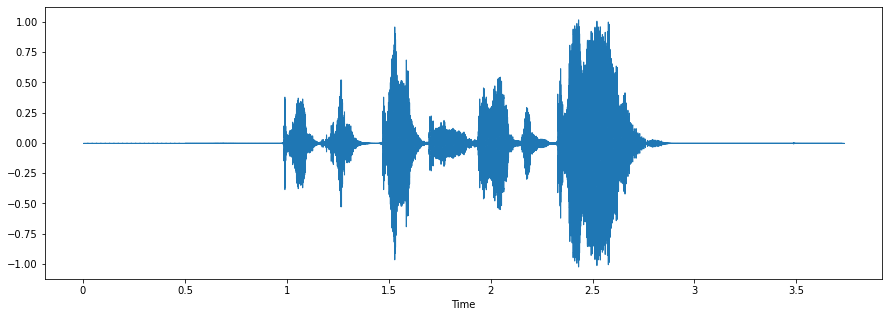

In [54]:
#Displaying our recorded audio

audio_file_path = 'ganga1.wav'
audio_data, sample_rate=librosa.load(audio_file_path)

plt.figure(figsize=(15, 5))
librosa.display.waveshow(audio_data, sr=sample_rate)

# Lets play the audio 
ipd.Audio(audio_file_path)

In [55]:
#Extracting the feature MFCC (Mel Frequency Cepstral Coefficients ) from our recording


mfccs_features = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)


#Scaling the feature
mfccs_scaled_features = (mfccs_scaled_features - mfccs_scaled_features.min())/ (mfccs_scaled_features.max() - mfccs_scaled_features.min())
mfccs_scaled_features

array([0.        , 1.        , 0.8768659 , 0.9348042 , 0.83702064,
       0.9034461 , 0.8305306 , 0.8956564 , 0.88754404, 0.88855106,
       0.88901454, 0.8698688 , 0.89812964, 0.8753651 , 0.898741  ,
       0.8918636 , 0.88646513, 0.8880956 , 0.9007731 , 0.8839255 ,
       0.8947186 , 0.8946547 , 0.89391696, 0.9069844 , 0.88867587,
       0.91430557, 0.88931626, 0.8967743 , 0.9048386 , 0.8989918 ,
       0.9011448 , 0.89605814, 0.9067037 , 0.89443505, 0.90594524,
       0.8990533 , 0.90433425, 0.9032263 , 0.90339315, 0.9063128 ],
      dtype=float32)

In [56]:
#Predicting the model
y_predict = np.argmax(hypermodel.predict(mfccs_scaled_features.reshape(1,-1)), axis=-1)
prediction_class = labelencoder.inverse_transform(y_predict) 
prediction_class

1/1 [==============================] - 1s 589ms/step


array(['sad'], dtype=object)